In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv ')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
'''
2. Find out all the feature names where Null values exist. 
'''
count_null = data.isnull().sum()
null_columns = count_null[count_null>0]
print(null_columns)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [25]:
'''
3. Fill the null values of the 'Age' column with the mean of the other values.  
And also fill the Null values of the 'Cabin' column with 'Unknown'. 
'''
age_mean = data["Age"].mean()
data['Age'].fillna(age_mean,inplace=True)
data["Cabin"].fillna("Unknown",inplace = True)


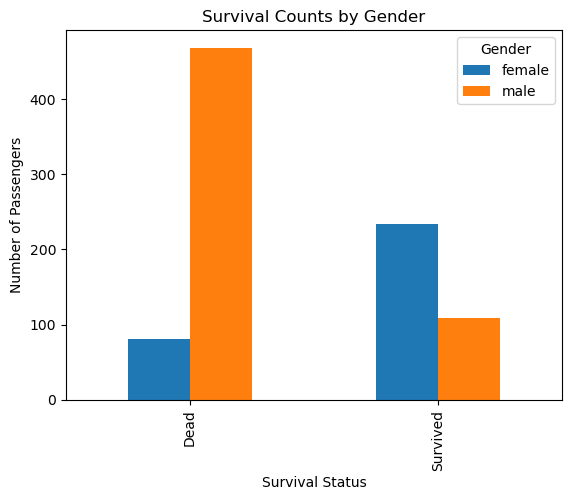

In [51]:
'''
4. Plot the dataset with 2 bars; Survived, Dead.  
And include Female and Male survivors' measurement in each bar. 
'''
survival_counts = data.groupby(['Survived', 'Sex']).size().unstack()
survival_counts = survival_counts.rename(index={0: 'Dead', 1: 'Survived'})

survival_counts.plot(kind='bar')
plt.title('Survival Counts by Gender')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.legend(title='Gender')
plt.show()

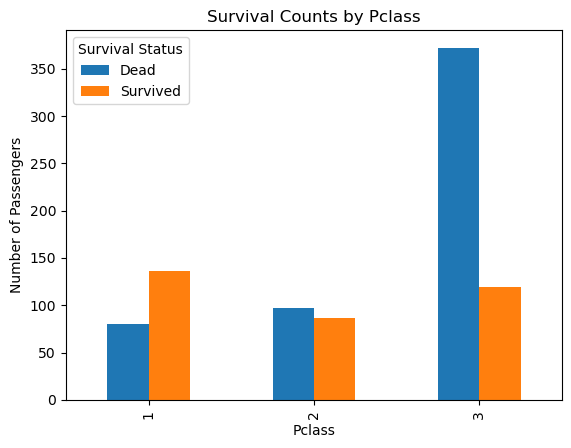

In [79]:
'''
5. Follow the step 4 and include the Survived, and Dead bars amongst the 'Pclass'. 
'''
survival_counts = data.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts = survival_counts.rename(columns={0: 'Dead', 1: 'Survived'})
survival_counts.plot(kind='bar')

plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status')
plt.show()

In [85]:
'''
6. Create a column named 'AgeClass' and insert values; 
* 0 if age <= 16 
* 1 if age <= 26 
* 2 if age <= 36 
* 3 if age <= 62 
* 4 otherwise 
'''
def categorize_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

data['AgeClass'] = data['Age'].apply(categorize_age)

print(data[['Age', 'AgeClass']].head())

   Age  AgeClass
0  NaN         4
1  NaN         4
2  NaN         4
3  NaN         4
4  NaN         4


In [113]:
'''
7. Now drop the column 'Age'. 
'''
data.drop('Age', axis=1,inplace = True)
data.head()

"\n7. Now drop the column 'Age'. \n"

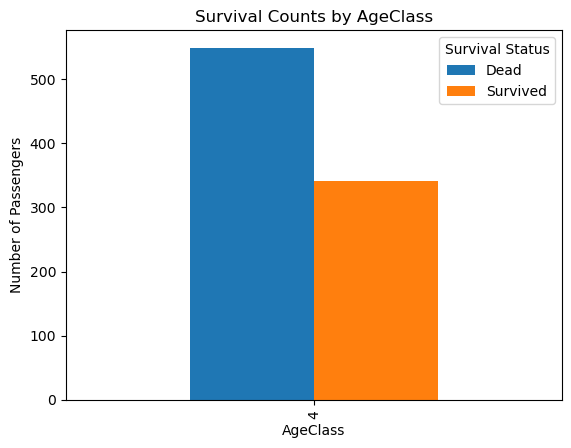

In [117]:
'''
8. Follow step 4 and create a bar plot of Survived and Dead using
the value counts amongst 'AgeClass' groups. 
'''
survival_counts = data.groupby(['AgeClass', 'Survived']).size().unstack()
survival_counts = survival_counts.rename(columns={0: 'Dead', 1: 'Survived'})

survival_counts.plot(kind='bar')

plt.title('Survival Counts by AgeClass')
plt.xlabel('AgeClass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status')
plt.show()

In [119]:
data.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
29,30,0,3,"Todoroff, Mr. Lalio",male,0,0,349216,7.8958,Unknown,S,4
665,666,0,2,"Hickman, Mr. Lewis",male,2,0,S.O.C. 14879,73.5000,Unknown,S,4
794,795,0,3,"Dantcheff, Mr. Ristiu",male,0,0,349203,7.8958,Unknown,S,4
588,589,0,3,"Gilinski, Mr. Eliezer",male,0,0,14973,8.0500,Unknown,S,4
389,390,1,2,"Lehmann, Miss. Bertha",female,0,0,SC 1748,12.0000,Unknown,C,4
...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,0,0,12460,7.7500,Unknown,Q,4
497,498,0,3,"Shellard, Mr. Frederick William",male,0,0,C.A. 6212,15.1000,Unknown,S,4
802,803,1,1,"Carter, Master. William Thornton II",male,1,2,113760,120.0000,B96 B98,S,4
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,1,0,A/5. 3336,16.1000,Unknown,S,4
